# Pipe Flow Lab Calcs and Stuff Because Excel is Dumb

Copper Tubing Large Diameter

|        | Volume (L) | Time (s) | Pressure (psi) | Temp (deg C)|
|--------|:--------:|:--------:|:--------:|:--------:|
|trans? | | | | |
|low |0.59 | 30.63 | 0.08 | 20 |
|medium |1.685 | 16.23 | 1.7 | 20 |
|high |1.075 | 8.82 | 2.23 | 20 |


Pipe constants

|Pipe Material | D (m) | L (m) | $\varepsilon$ (m) | $\varepsilon/D$ | D to use (mm) |
|:--------|:--------:|:--------:|:--------:|:--------:|:--------:|
|Copper Large | 0.00805 | 1.510 | 1.50E-6 | 1.86E-4 | 8.05 |
|Copper Medium | 0.0031 | 1.500 | 1.50E-6 | 4.84E-4 | 3.1 |
|Copper Small | 0.0018 | 1.500 | 1.50E-6 | 8.33E-4 | 1.8 |
|Pex | 0.00855 | 1.520 | 0 | 0 | 8.55 |
|Galvanized | 0.0066 | 1.510 | 1.50E-4 | 2.27E-2 | 6.6 |

From energy equation:

$\frac{\Delta P}{\rho g} = \frac{8fL\dot{V}^2}{D^5 \pi^2 g}$

Solving for f gives

$f = \frac{\Delta P D^5 \pi^2}{8 \rho L \dot{V}^2}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from IsaacsPackage.fluids import haaland
from IsaacsPackage.fluids import flaminar
from IsaacsPackage.displayfunc import display
from IsaacsPackage.displayfunc import latextable
from IsaacsPackage.displayfunc import markdowntable
init_printing()
%matplotlib inline

Getting all the data

In [3]:
vlm,t,P,T,nu,rho = np.loadtxt('PipeFlowLabData.csv',unpack=True,delimiter=',',skiprows=1)
D,L,eD = np.loadtxt('PipeFlowLabConstants.csv',unpack=True,delimiter=',',skiprows=1,usecols=(0,1,3))

Conversions

In [4]:
P *= 6.895e3
vDot = vlm/1000/t

Copper Tube Large Diameter

In [5]:
f = []
Re = []
Flow = []
#Large Copper
for i in range(3):
    f.append(P[i]*np.pi**2*D[0]**5/8/L[0]/vDot[i]**2/rho[i])
    Re.append(4*vDot[i]/np.pi/nu[i]/D[0])
    Flow.append('Turbulent' if Re[i]>2300 else 'Laminar')
#Medium Copper
for i in range(3,7):
    f.append(P[i]*np.pi**2*D[1]**5/8/L[1]/vDot[i]**2/rho[i])
    Re.append(4*vDot[i]/np.pi/nu[i]/D[1])
    Flow.append('Turbulent' if Re[i]>2300 else 'Laminar')
#Small Copper
for i in range(7,11):
    f.append(P[i]*np.pi**2*D[2]**5/8/L[2]/vDot[i]**2/rho[i])
    Re.append(4*vDot[i]/np.pi/nu[i]/D[2])
    Flow.append('Turbulent' if Re[i]>2300 else 'Laminar')
#Pex
for i in range(11,14):
    f.append(P[i]*np.pi**2*D[3]**5/8/L[3]/vDot[i]**2/rho[i])
    Re.append(4*vDot[i]/np.pi/nu[i]/D[3])
    Flow.append('Turbulent' if Re[i]>2300 else 'Laminar')
#Galvanized Iron
for i in range(14,18):
    f.append(P[i]*np.pi**2*D[4]**5/8/L[4]/vDot[i]**2/rho[i])
    Re.append(4*vDot[i]/np.pi/nu[i]/D[4])
    Flow.append('Turbulent' if Re[i]>2300 else 'Laminar')
for i in [4,8,15]:
    Flow[i] = 'Transitional'

#printing
print('Volume\tf\t\tRe\tFlow')
for i in range(len(f)):
    print('{0}\t{1:.4e}\t{2:.0f}\t{3}'.format(vlm[i],f[i],Re[i],Flow[i]))
markdowntable([vlm,
               ['{0:.4e}'.format(i) for i in f],
               ['{0:.0f}'.format(i) for i in Re],
               Flow])

Volume	f		Re	Flow
0.59	4.1143e-02	3034	Turbulent
1.685	3.0096e-02	16355	Turbulent
1.075	2.8644e-02	19201	Turbulent
0.032	1.4975e-01	432	Laminar
0.172	4.1275e-02	2329	Transitional
0.42	3.6106e-02	5662	Turbulent
0.6	3.4412e-02	8112	Turbulent
0.01	1.4353e-01	510	Laminar
0.0895	4.8549e-02	2152	Transitional
0.036	4.6945e-02	2366	Turbulent
0.235	5.3579e-02	2856	Turbulent
0.765	4.4927e-02	3816	Turbulent
2.55	3.5033e-02	12748	Turbulent
3.75	3.2760e-02	18668	Turbulent
0.19	3.7231e-02	1880	Laminar
0.42	6.3770e-02	2658	Transitional
0.98	5.2351e-02	11892	Turbulent
0.99	5.3560e-02	16400	Turbulent
| 0.59 | 4.1143e-02 | 3034 | Turbulent |
| 1.685 | 3.0096e-02 | 16355 | Turbulent |
| 1.075 | 2.8644e-02 | 19201 | Turbulent |
| 0.032 | 1.4975e-01 | 432 | Laminar |
| 0.172 | 4.1275e-02 | 2329 | Transitional |
| 0.42 | 3.6106e-02 | 5662 | Turbulent |
| 0.6 | 3.4412e-02 | 8112 | Turbulent |
| 0.01 | 1.4353e-01 | 510 | Laminar |
| 0.0895 | 4.8549e-02 | 2152 | Transitional |
| 0.036 | 4.6945e-02 | 2366 | Tur

Current Calculated Data

| Volume (L) | f measured | Re | Flow type |
|:--------:|:--------:|:--------:|:--------:|
| 0.59 | 4.1143e-02 | 3034 | Turbulent |
| 1.685 | 3.0096e-02 | 16355 | Turbulent |
| 1.075 | 2.8644e-02 | 19201 | Turbulent |
| 0.032 | 1.4975e-01 | 432 | Laminar |
| 0.172 | 4.1275e-02 | 2329 | Transitional |
| 0.42 | 3.6106e-02 | 5662 | Turbulent |
| 0.6 | 3.4412e-02 | 8112 | Turbulent |
| 0.01 | 1.4353e-01 | 510 | Laminar |
| 0.0895 | 4.8549e-02 | 2152 | Transitional |
| 0.036 | 4.6945e-02 | 2366 | Turbulent |
| 0.235 | 5.3579e-02 | 2856 | Turbulent |
| 0.765 | 4.4927e-02 | 3816 | Turbulent |
| 2.55 | 3.5033e-02 | 12748 | Turbulent |
| 3.75 | 3.2760e-02 | 18668 | Turbulent |
| 0.19 | 3.7231e-02 | 1880 | Laminar |
| 0.42 | 6.3770e-02 | 2658 | Transitional |
| 0.98 | 5.2351e-02 | 11892 | Turbulent |
| 0.99 | 5.3560e-02 | 16400 | Turbulent |

Time to Calculate Theoretical Friction Factors and percent error

In [9]:
ftheolam = []
ftheoturb = []
#Large copper
for i in range(3):
    if Flow[i] == 'Transitional':
        ftheolam.append(flaminar(Re[i]))
        ftheoturb.append(haaland(Re[i],eD[0]))
    elif Flow[i] == "Turbulent":
        ftheoturb.append(haaland(Re[i],eD[0]))
        ftheolam.append(0)
    else:
        ftheolam.append(flaminar(Re[i]))
        ftheoturb.append(0)
for i in range(3,7):
    if Flow[i] == 'Transitional':
        ftheolam.append(flaminar(Re[i]))
        ftheoturb.append(haaland(Re[i],eD[1]))
    elif Flow[i] == "Turbulent":
        ftheoturb.append(haaland(Re[i],eD[1]))
        ftheolam.append(0)
    else:
        ftheolam.append(flaminar(Re[i]))
        ftheoturb.append(0)
for i in range(7,11):
    if Flow[i] == 'Transitional':
        ftheolam.append(flaminar(Re[i]))
        ftheoturb.append(haaland(Re[i],eD[2]))
    elif Flow[i] == "Turbulent":
        ftheoturb.append(haaland(Re[i],eD[2]))
        ftheolam.append(0)
    else:
        ftheolam.append(flaminar(Re[i]))
        ftheoturb.append(0)
for i in range(11,14):
    if Flow[i] == 'Transitional':
        ftheolam.append(flaminar(Re[i]))
        ftheoturb.append(haaland(Re[i],eD[3]))
    elif Flow[i] == "Turbulent":
        ftheoturb.append(haaland(Re[i],eD[3]))
        ftheolam.append(0)
    else:
        ftheolam.append(flaminar(Re[i]))
        ftheoturb.append(0)
for i in range(14,18):
    if Flow[i] == 'Transitional':
        ftheolam.append(flaminar(Re[i]))
        ftheoturb.append(haaland(Re[i],eD[4]))
    elif Flow[i] == "Turbulent":
        ftheoturb.append(haaland(Re[i],eD[4]))
        ftheolam.append(0)
    else:
        ftheolam.append(flaminar(Re[i]))
        ftheoturb.append(0)

#Percent Error time
epercent = []
for i in range(len(f)):
    if Flow[i] == 'Laminar':
        epercent.append(abs((ftheolam[i]-f[i])/f[i]*100))
    elif Flow[i] == 'Turbulent':
        epercent.append(abs((ftheoturb[i]-f[i])/f[i]*100))
    else:
        epercent.append(0)

markdowntable([
    ['{0:.4e}'.format(i) if i != 0 else '' for i in f],
    Flow,
    ['{0:.4e}'.format(i) if i != 0 else '' for i in ftheoturb],
    ['{0:.4e}'.format(i) if i != 0 else '' for i in ftheolam],
    ['{0:.4f}'.format(i) if i != 0 else '' for i in epercent]
])

| 4.1143e-02 | Turbulent | 4.4283e-02 |  | 7.6324 |
| 3.0096e-02 | Turbulent | 2.7376e-02 |  | 9.0372 |
| 2.8644e-02 | Turbulent | 2.6319e-02 |  | 8.1187 |
| 1.4975e-01 | Laminar |  | 1.4811e-01 | 1.0906 |
| 4.1275e-02 | Transitional | 4.8552e-02 | 2.7475e-02 |  |
| 3.6106e-02 | Turbulent | 3.6774e-02 |  | 1.8509 |
| 3.4412e-02 | Turbulent | 3.3265e-02 |  | 3.3342 |
| 1.4353e-01 | Laminar |  | 1.2556e-01 | 12.5162 |
| 4.8549e-02 | Transitional | 5.0098e-02 | 2.9739e-02 |  |
| 4.6945e-02 | Turbulent | 4.8524e-02 |  | 3.3640 |
| 5.3579e-02 | Turbulent | 4.5617e-02 |  | 14.8616 |
| 4.4927e-02 | Turbulent | 4.1028e-02 |  | 8.6773 |
| 3.5033e-02 | Turbulent | 2.8924e-02 |  | 17.4376 |
| 3.2760e-02 | Turbulent | 2.6199e-02 |  | 20.0261 |
| 3.7231e-02 | Laminar |  | 3.4035e-02 | 8.5855 |
| 6.3770e-02 | Transitional | 6.2942e-02 | 2.4079e-02 |  |
| 5.2351e-02 | Turbulent | 5.4102e-02 |  | 3.3449 |
| 5.3560e-02 | Turbulent | 5.3327e-02 |  | 0.4342 |


Friction factors with calculated values

| $f_{meas}$ | Flow | $f_{theo-turb}$ | $f_{theo-lam}$ | $e\ (\%)$ |
|:--------:|:--------:|:--------:|:--------:|:--------:|
| 4.1143e-02 | Turbulent | 4.4283e-02 |  | 7.6324 |
| 3.0096e-02 | Turbulent | 2.7376e-02 |  | 9.0372 |
| 2.8644e-02 | Turbulent | 2.6319e-02 |  | 8.1187 |
| 1.4975e-01 | Laminar |  | 1.4811e-01 | 1.0906 |
| 4.1275e-02 | Transitional | 4.8552e-02 | 2.7475e-02 |  |
| 3.6106e-02 | Turbulent | 3.6774e-02 |  | 1.8509 |
| 3.4412e-02 | Turbulent | 3.3265e-02 |  | 3.3342 |
| 1.4353e-01 | Laminar |  | 1.2556e-01 | 12.5162 |
| 4.8549e-02 | Transitional | 5.0098e-02 | 2.9739e-02 |  |
| 4.6945e-02 | Turbulent | 4.8524e-02 |  | 3.3640 |
| 5.3579e-02 | Turbulent | 4.5617e-02 |  | 14.8616 |
| 4.4927e-02 | Turbulent | 4.1028e-02 |  | 8.6773 |
| 3.5033e-02 | Turbulent | 2.8924e-02 |  | 17.4376 |
| 3.2760e-02 | Turbulent | 2.6199e-02 |  | 20.0261 |
| 3.7231e-02 | Laminar |  | 3.4035e-02 | 8.5855 |
| 6.3770e-02 | Transitional | 6.2942e-02 | 2.4079e-02 |  |
| 5.2351e-02 | Turbulent | 5.4102e-02 |  | 3.3449 |
| 5.3560e-02 | Turbulent | 5.3327e-02 |  | 0.4342 |

#### Plot Time

Pressure Drop vs Flow Rate

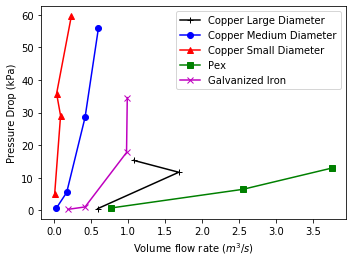

In [30]:
plt.figure(figsize=(5,3.75))
display(vlm[0:3],[i/1000 for i in P[0:3]],'k-+',label='Copper Large Diameter')
display(vlm[3:7],[i/1000 for i in P[3:7]],'b-o',label='Copper Medium Diameter')
display(vlm[7:11],[i/1000 for i in P[7:11]],'r-^',label='Copper Small Diameter')
display(vlm[11:14],[i/1000 for i in P[11:14]],'g-s',label='Pex')
display(vlm[14:18],[i/1000 for i in P[14:18]],'m-x',label='Galvanized Iron',
       xlabel=r'Volume flow rate ($m^3/s$)',
       ylabel=r'Pressure Drop (kPa)',
       done=True,
       plotLabel='PressureDropPlot',
       save=True)

Measured and theoretical friction factor for each pipe
Have to make a list for f theoretical

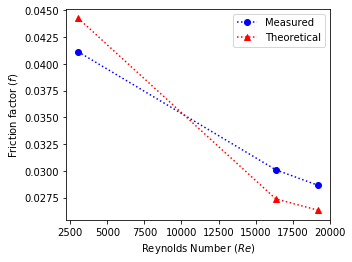

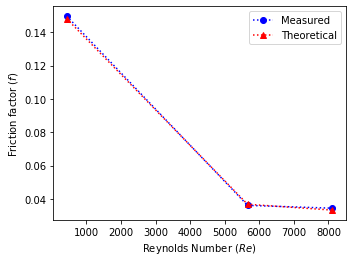

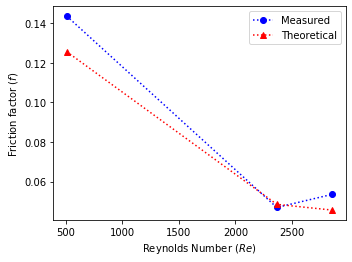

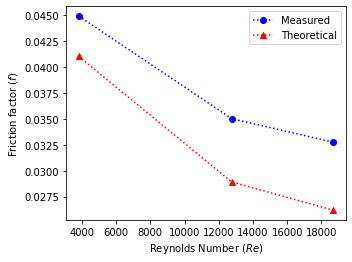

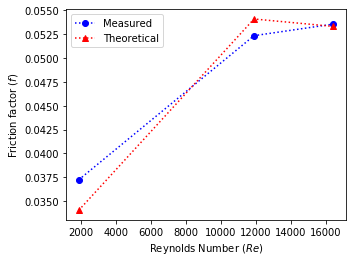

In [31]:
ftheo = [ftheolam[i] + ftheoturb[i] if Flow[i] != 'Transitional' else 0 for i in range(len(f))]
#Copper Large
plt.figure(figsize=(5,3.75))
display(
        Re[0:3],
        f[0:3],
        'b:o',
        label='Measured')
display(
        Re[0:3],
        ftheo[0:3],
        'r:^',
        label='Theoretical',
        xlabel=r'Reynolds Number ($Re$)',
        ylabel=r'Friction factor ($f$)',
        done=True,
        plotLabel='fPlotCopperLarge',
        save=True)
#Copper Medium
plt.figure(figsize=(5,3.75))
display(
        [Re[i] for i in [3,5,6]],
        [f[i] for i in [3,5,6]],
        'b:o',
        label='Measured')
display(
        [Re[i] for i in [3,5,6]],
        [ftheo[i] for i in [3,5,6]],
        'r:^',
        label='Theoretical',
        xlabel=r'Reynolds Number ($Re$)',
        ylabel=r'Friction factor ($f$)',
        done=True,
        plotLabel='fPlotCopperMedium',
        save=True)
#Copper Small
plt.figure(figsize=(5,3.75))
display(
        [Re[i] for i in [7,9,10]],
        [f[i] for i in [7,9,10]],
        'b:o',
        label='Measured')
display(
        [Re[i] for i in [7,9,10]],
        [ftheo[i] for i in [7,9,10]],
        'r:^',
        label='Theoretical',
        xlabel=r'Reynolds Number ($Re$)',
        ylabel=r'Friction factor ($f$)',
        done=True,
        plotLabel='fPlotCopperSmall',
        save=True)
#Pex
plt.figure(figsize=(5,3.75))
display(
        Re[11:14],
        f[11:14],
        'b:o',
        label='Measured')
display(
        Re[11:14],
        ftheo[11:14],
        'r:^',
        label='Theoretical',
        xlabel=r'Reynolds Number ($Re$)',
        ylabel=r'Friction factor ($f$)',
        done=True,
        plotLabel='fPlotPex',
        save=True)
#Galvanized Iron Pipe
plt.figure(figsize=(5,3.75))
display(
        [Re[i] for i in [14,16,17]],
        [f[i] for i in [14,16,17]],
        'b:o',
        label='Measured')
display(
        [Re[i] for i in [14,16,17]],
        [ftheo[i] for i in [14,16,17]],
        'r:^',
        label='Theoretical',
        xlabel=r'Reynolds Number ($Re$)',
        ylabel=r'Friction factor ($f$)',
        done=True,
        plotLabel='fPlotGalvanized',
        save=True)

Time to make table using f,Re,Flow,ftheolam,ftheoturb,epercent

In [28]:
latextable(
        [['{0:.4e}'.format(i) for i in f],
        ['{0:.0f}'.format(i) for i in Re],
        Flow,
        ['{0:.4e}'.format(i) if i != 0 else '' for i in ftheolam],
        ['{0:.4e}'.format(i) if i != 0 else '' for i in ftheoturb],
        ['{0:.2f}'.format(i) if i != 0 else '' for i in epercent]])

markdowntable([['{0:.4e}'.format(i) for i in f],
        ['{0:.0f}'.format(i) for i in Re],
        Flow,
        ['{0:.4e}'.format(i) if i != 0 else '' for i in ftheolam],
        ['{0:.4e}'.format(i) if i != 0 else '' for i in ftheoturb],
        ['{0:.2f}'.format(i) if i != 0 else '' for i in epercent]])

4.1143e-02 & 3034 & Turbulent &  & 4.4283e-02 & 7.63
3.0096e-02 & 16355 & Turbulent &  & 2.7376e-02 & 9.04
2.8644e-02 & 19201 & Turbulent &  & 2.6319e-02 & 8.12
1.4975e-01 & 432 & Laminar & 1.4811e-01 &  & 1.09
4.1275e-02 & 2329 & Transitional & 2.7475e-02 & 4.8552e-02 & 
3.6106e-02 & 5662 & Turbulent &  & 3.6774e-02 & 1.85
3.4412e-02 & 8112 & Turbulent &  & 3.3265e-02 & 3.33
1.4353e-01 & 510 & Laminar & 1.2556e-01 &  & 12.52
4.8549e-02 & 2152 & Transitional & 2.9739e-02 & 5.0098e-02 & 
4.6945e-02 & 2366 & Turbulent &  & 4.8524e-02 & 3.36
5.3579e-02 & 2856 & Turbulent &  & 4.5617e-02 & 14.86
4.4927e-02 & 3816 & Turbulent &  & 4.1028e-02 & 8.68
3.5033e-02 & 12748 & Turbulent &  & 2.8924e-02 & 17.44
3.2760e-02 & 18668 & Turbulent &  & 2.6199e-02 & 20.03
3.7231e-02 & 1880 & Laminar & 3.4035e-02 &  & 8.59
6.3770e-02 & 2658 & Transitional & 2.4079e-02 & 6.2942e-02 & 
5.2351e-02 & 11892 & Turbulent &  & 5.4102e-02 & 3.34
5.3560e-02 & 16400 & Turbulent &  & 5.3327e-02 & 0.43
| 4.1143e-02 | 30

|$f_{meas}$ | $Re$ | Flow | $f_{theo-lam}$ | $f_{theo-turb}$ | $e$ |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
| 4.1143e-02 | 3034 | Turbulent |  | 4.4283e-02 | 7.63 |
| 3.0096e-02 | 16355 | Turbulent |  | 2.7376e-02 | 9.04 |
| 2.8644e-02 | 19201 | Turbulent |  | 2.6319e-02 | 8.12 |
| 1.4975e-01 | 432 | Laminar | 1.4811e-01 |  | 1.09 |
| 4.1275e-02 | 2329 | Transitional | 2.7475e-02 | 4.8552e-02 |  |
| 3.6106e-02 | 5662 | Turbulent |  | 3.6774e-02 | 1.85 |
| 3.4412e-02 | 8112 | Turbulent |  | 3.3265e-02 | 3.33 |
| 1.4353e-01 | 510 | Laminar | 1.2556e-01 |  | 12.52 |
| 4.8549e-02 | 2152 | Transitional | 2.9739e-02 | 5.0098e-02 |  |
| 4.6945e-02 | 2366 | Turbulent |  | 4.8524e-02 | 3.36 |
| 5.3579e-02 | 2856 | Turbulent |  | 4.5617e-02 | 14.86 |
| 4.4927e-02 | 3816 | Turbulent |  | 4.1028e-02 | 8.68 |
| 3.5033e-02 | 12748 | Turbulent |  | 2.8924e-02 | 17.44 |
| 3.2760e-02 | 18668 | Turbulent |  | 2.6199e-02 | 20.03 |
| 3.7231e-02 | 1880 | Laminar | 3.4035e-02 |  | 8.59 |
| 6.3770e-02 | 2658 | Transitional | 2.4079e-02 | 6.2942e-02 |  |
| 5.2351e-02 | 11892 | Turbulent |  | 5.4102e-02 | 3.34 |
| 5.3560e-02 | 16400 | Turbulent |  | 5.3327e-02 | 0.43 |